## 회귀
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

### 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

https://blog.naver.com/PostView.nhn?blogId=bya135&logNo=222228358219&parentCategoryNo=&categoryNo=24&viewDate=&isShowPopularPosts=true&from=search<br>
https://libertegrace.tistory.com/entry/Evaluation2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1) 단순회귀분석

In [2]:
df = pd.read_excel('auto-mpg.xlsx', engine = 'openpyxl')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [4]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   horsepower  398 non-null    object 
 3   weight      398 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [5]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

=> ? 처리

In [6]:
ndf.horsepower.replace('?', np.nan, inplace=True) # ?를 null로 교체
ndf.dropna(subset = ['horsepower'], axis = 0, inplace = True) # null값있는 곳 전체 행 삭제
ndf['horsepower'] = ndf['horsepower'].astype('float') # float로 변환
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [7]:
ndf.to_pickle('auto-mpg.pkl')
ndf = pd.read_pickle('auto-mpg.pkl')

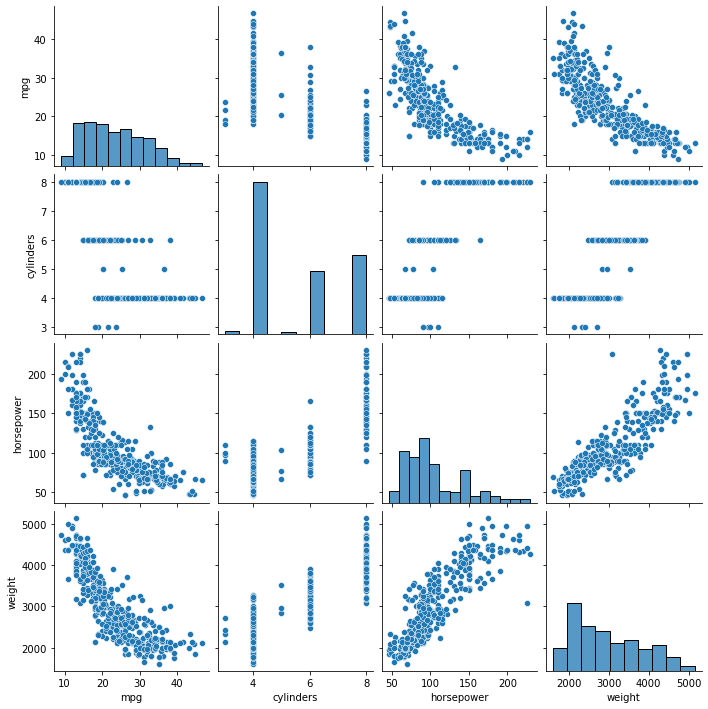

In [8]:
sns.pairplot(ndf)

In [9]:
X = ndf[['weight']] #독립변수
y = ndf[['mpg']] #종속변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11)
print(len(X_train), len(X_test))

274 118


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

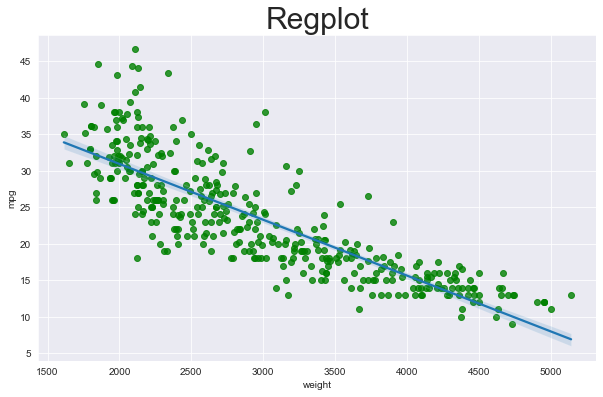

In [10]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 1, figsize = (10, 6))
plt.title('Regplot', fontsize = 30)
# x, y축 값의 산점도와 선형회귀직선 출력
sns.regplot(ax = axes, x = 'weight', y = 'mpg', data = ndf, scatter_kws = {'color':'green'})

=> 몸무게와 mpg의 관계

In [11]:
# 선형회귀
from sklearn.linear_model import LinearRegression

# 알고리즘 객체
lr = LinearRegression()
lr.fit(X_train, y_train)
# 예측
y_preds = lr.predict(X_test)

In [12]:
# 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print(f'MSE: {mse: .2f}, RMSE : {rmse: .2f}, R2_SCORE : {r2:.2f}')

MSE:  22.17, RMSE :  4.71, R2_SCORE : 0.64


=> 설명력이 64%정도 (분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표)

In [13]:
# 선형회귀 계수 확인 (절편_ intercept속성, 회귀계수_coef에 속성)
y_ = lr.intercept_
a_ = np.round(lr.coef_, 2)
print('절편:', y_, '기울기:', a_[0])

절편: [45.9712177] 기울기: [-0.01]


=> x축과 y축의 단위 차이가 커서 기울기가 적게 나옴 (x축은 1500~5000, y축은 5~50)

<AxesSubplot:ylabel='Density'>

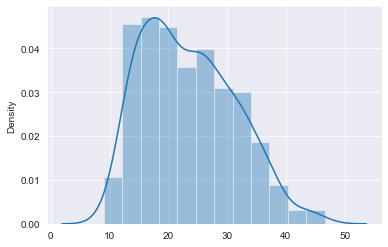

In [14]:
# 히스토그램 출력 (y값에 대해서)
sns.distplot(y)

<AxesSubplot:ylabel='Density'>

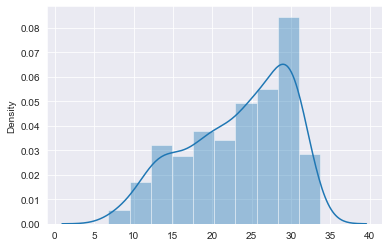

In [15]:
# 예측값 (x_weight값에 대해서)
y_hat = lr.predict(X)
sns.distplot(y_hat)

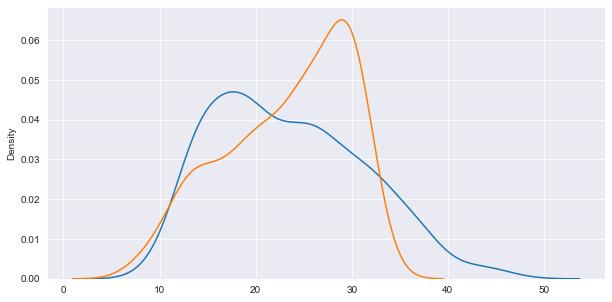

In [16]:
# 위 그래프 두 개 곡선 그래프 한번에 출력
plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y, hist = False, label = 'y')
ax2 = sns.distplot(y_hat, hist= False, label = 'y_hat')

=> 실제 값(파란색)은 왼쪽 편향, 예측 값(노란색)은 오른쪽으로 편향되는 경향을 보임 -> 모형의 오차를 줄일 필요가 있음

### 2) 다항회귀분석 (p.329)
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관<br>
https://chana.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D5-%EB%8B%A4%ED%95%AD-%ED%9A%8C%EA%B7%80

In [17]:
df = pd.read_pickle('auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [18]:
X = df[['weight']] #독립변수
y = df[['mpg']] #종속변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11)
print(len(X_train), len(X_test))

274 118


In [51]:
# 단항식을 다항식으로 변환
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환 함수

poly = PolynomialFeatures(degree=2) #2차로 정함 
X_train_poly = poly.fit_transform(X_train) # X에대한게 다항식으로 변환

print(X_train.shape, X_train_poly.shape)
print(X_train[:5], '\n', '------','\n', X_train_poly[:5])
print('차수: ', poly.get_feature_names())

(274, 1) (274, 3)
     weight
311    2120
106    4499
332    1845
216    2045
349    1985 
 ------ 
 [[1.0000000e+00 2.1200000e+03 4.4944000e+06]
 [1.0000000e+00 4.4990000e+03 2.0241001e+07]
 [1.0000000e+00 1.8450000e+03 3.4040250e+06]
 [1.0000000e+00 2.0450000e+03 4.1820250e+06]
 [1.0000000e+00 1.9850000e+03 3.9402250e+06]]
차수:  ['1', 'x0', 'x0^2']


In [52]:
# 변환한 변수를 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# test데이터 다항식 변환
X_test_poly = poly.fit_transform(X_test)

# r_squre (설계한 모형의 오차가 작으면 r_squre가 커짐, 설계한 모형의 오차가 크면 r_squre가 감소)
r_squre = pr.score(X_test_poly, y_test)
r_squre

0.6368479947378759

In [53]:
# 기울기, 절편
print(pr.coef_) #2차함수라 3개로 출력
print(pr.intercept_)

[[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]]
[65.12274143]


Text(0, 0.5, 'mpg')

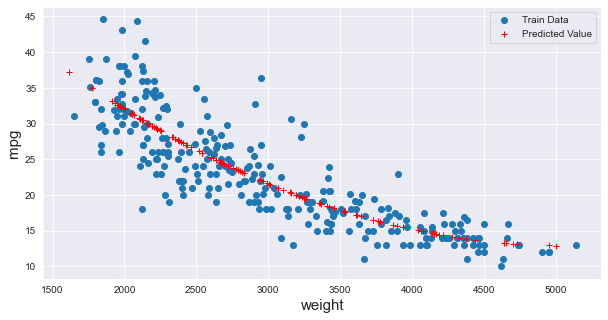

In [54]:
# 그래프 출력
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.array(X_train), np.array(y_train), 'o', label = 'Train Data') # 데이터 분포 (데이터프레임을 배열로 바꾸고 출력)
ax.plot(np.array(X_test), np.array(y_hat_test), 'r+', label = 'Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc = 'best')
plt.xlabel('weight', size = 15)
plt.ylabel('mpg', size = 15)

### 3) 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [60]:
ndf = pd.read_pickle('auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [63]:
# 독립변수 여러개 설정
X = ndf.drop('mpg', axis = 1) # mpg빼고 다
y = ndf['mpg']

# 학습용, 테스트용 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)
print(X_train.shape, X_test.shape)

(274, 3) (118, 3)


In [66]:
lr = LinearRegression()
# 학습
lr.fit(X_train, y_train)
# 예측
y_preds = lr.predict(X_test)
# 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_squre = lr.score(X_test, y_test)
print(f'MSE : {mse: .3f}, RMSE : {rmse: .3f}, R_Squre : {r_squre: .3f}')

# 절편
print('절편')
print('기울기:' , lr.coef_)
print('y절편:' , lr.intercept_)

MSE :  17.330, RMSE :  4.163, R_Squre :  0.694
절편
기울기: [-0.60691288 -0.03714088 -0.00522268]
y절편: 46.41435126963405


#### 과제_0915_2
아래 boston 데이터 셋으로 보스턴 주택가격 예측 모델을 만들고 평가하세요. (p.324)

In [21]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())

bdf = pd.DataFrame(boston.data, columns = boston.feature_names)
bdf.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
# 종속변수_데이터세트의 target 가져옴
boston.target
bdf['price'] = boston.target
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [28]:
# 상관관계 확인
bdf.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


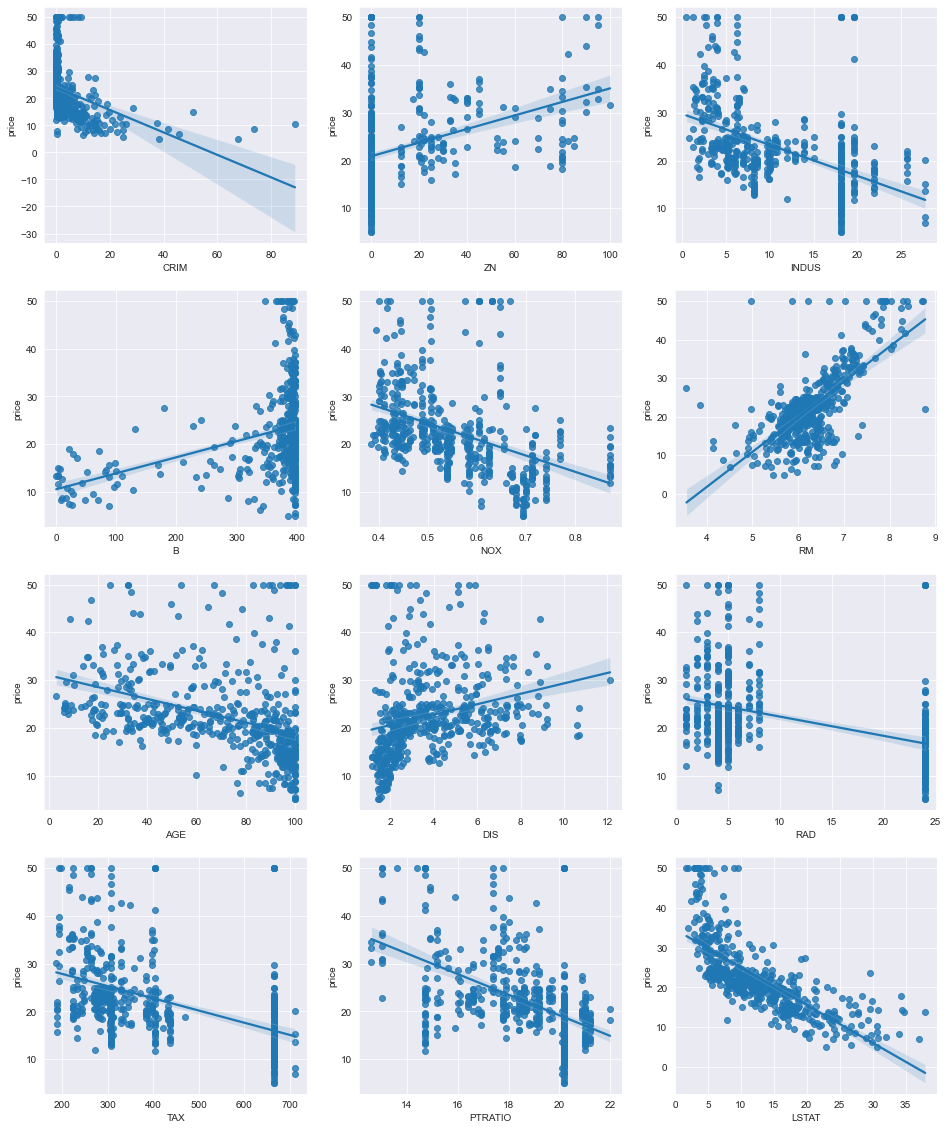

In [88]:
# 그래프로 확인 (regplot사용)

fig, axs = plt.subplots(figsize = (16, 20), ncols=3, nrows = 4)
lm_features = ['CRIM', 'ZN', 'INDUS', 'B', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'] #CHAS 제외

for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y= 'price', data = bdf, ax = axs[row][col])

=> RM(거주할 수있는 방 개수/크기)과 LSTAT(하위 계층의 비율)이 PRICE와의 상관이 가장 커보임

### 1) 회귀모델 생성 후 학습 및 예측

In [61]:
y = bdf['price']
X = bdf.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

# 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_squre = lr.score(X_test, y_test)
# r2_score = r2_score(y_test, y_preds)

print(f'MSE : {mse: .3f}, RMSE : {rmse: .3f}, R : {r_squre: .3f}')

MSE :  17.297, RMSE :  4.159, R :  0.757


In [67]:
# 회귀계수 확인
y_ = lr.intercept_
x_ = lr.coef_

print('절편', y_)
np.round(x_, 1)

절편 40.995595172164336


array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [68]:
# 회귀 계수를 큰 값 순으로 정렬 (각 컬럼이랑 매칭)
coeff = pd.Series(data = np.round(x_, 1), index = X.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

=> NOX의 회귀계수가 너무 큼(확인 필요)

In [70]:
# 5개의 폴드 세트에서 교차검증을 통해 MSE, RMSE측정(cross_val_score사용)

from sklearn.model_selection import cross_val_score

# 위에서 나눈 X, y값을 5폴드 세트로 값 확인
neg_mse_score = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_score) # scoring 이용시 mse값에 -1을 곱해서 반환하여 다시 -1을 곱해줌 (mse가 낮을 수록 좋은 지표이기 때문에 metric 평가 기준에 부합시키기 위해 -1을 곱해서 나옴)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_score, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(f'5 folds의 평균 RMSE: {avg_rmse: .3f}')

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE:  5.829


In [89]:
# 6개의 폴드 세트에서 교차검증을 통해 MSE, RMSE측정(cross_val_score사용)

from sklearn.model_selection import cross_val_score

# 위에서 나눈 X, y값을 6폴드 세트로 값 확인
neg_mse_score = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 6)
rmse_scores = np.sqrt(-1*neg_mse_score) # scoring 이용시 mse값에 -1을 곱해서 반환하여 다시 -1을 곱해줌 (mse가 낮을 수록 좋은 지표이기 때문에 metric 평가 기준에 부합시키기 위해 -1을 곱해서 나옴)
avg_rmse = np.mean(rmse_scores)

print('6 folds의 개별 Negative MSE scores: ', np.round(neg_mse_score, 2))
print('6 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(f'6 folds의 평균 RMSE: {avg_rmse: .3f}')

6 folds의 개별 Negative MSE scores:  [ -10.68  -20.    -38.71  -23.15 -155.25  -62.13]
6 folds의 개별 RMSE scores:  [ 3.27  4.47  6.22  4.81 12.46  7.88]
6 folds의 평균 RMSE:  6.519


In [93]:
# 폴드별 차이 출력해보기

fold_li = [5,6,7,8,9,10]

for i in fold_li:
    neg_mse_score = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = i)
    rmse_scores = np.sqrt(-1*neg_mse_score) # scoring 이용시 mse값에 -1을 곱해서 반환하여 다시 -1을 곱해줌 (mse가 낮을 수록 좋은 지표이기 때문에 metric 평가 기준에 부합시키기 위해 -1을 곱해서 나옴)
    avg_rmse = np.mean(rmse_scores)

    print('==================================')
    print(f'{i} folds의 개별 Negative MSE scores: ', np.round(neg_mse_score, 2))
    print(f'{i} folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
    print(f'{i} folds의 평균 RMSE: {avg_rmse: .3f}')

5 folds의 개별 Negative MSE scores:  [ -10.12  -33.25  -39.73 -106.65  -73.85]
5 folds의 개별 RMSE scores:  [ 3.18  5.77  6.3  10.33  8.59]
5 folds의 평균 RMSE:  6.834
6 folds의 개별 Negative MSE scores:  [ -10.68  -20.    -38.71  -23.15 -155.25  -62.13]
6 folds의 개별 RMSE scores:  [ 3.27  4.47  6.22  4.81 12.46  7.88]
6 folds의 평균 RMSE:  6.519
7 folds의 개별 Negative MSE scores:  [ -12.07   -8.29  -55.04  -36.14   -5.29 -194.51  -51.63]
7 folds의 개별 RMSE scores:  [ 3.47  2.88  7.42  6.01  2.3  13.95  7.19]
7 folds의 평균 RMSE:  6.174
8 folds의 개별 Negative MSE scores:  [ -13.19   -4.68  -42.    -26.87  -30.41 -138.88 -105.55  -41.64]
8 folds의 개별 RMSE scores:  [ 3.63  2.16  6.48  5.18  5.51 11.78 10.27  6.45]
8 folds의 평균 RMSE:  6.436
9 folds의 개별 Negative MSE scores:  [ -14.03   -5.34  -26.77  -45.2   -30.49   -9.74 -170.54 -117.45  -33.49]
9 folds의 개별 RMSE scores:  [ 3.75  2.31  5.17  6.72  5.52  3.12 13.06 10.84  5.79]
9 folds의 평균 RMSE:  6.253
10 folds의 개별 Negative MSE scores:  [ -15.07   -5.17  -10.84  -64.

In [77]:
# RM과 LSTAT 만 따로 뽑아서 확인 
# RM
y = bdf[['price']]
X = bdf[['RM']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_squre = lr.score(X_test, y_test)

print(f'MSE : {mse: .3f}, RMSE : {rmse: .3f}, R : {r_squre: .3f}')

MSE :  51.171, RMSE :  7.153, R :  0.440
